# IMPORTING NECESSARY LIBRARIES

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('loan_prediction.csv')

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DATA PRE PROCESSING

In [74]:
data.shape

(614, 13)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [77]:
data = data.drop('Loan_ID', axis = 1)  # dropping the loan id column as it is of no use to us

In [79]:
data.shape

(614, 12)

In [80]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)


In [82]:
data.isnull().sum().sum()# No null value present in our dataset now

0

In [83]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


# EXPLORATORY DATA ANALYSIS

In [84]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

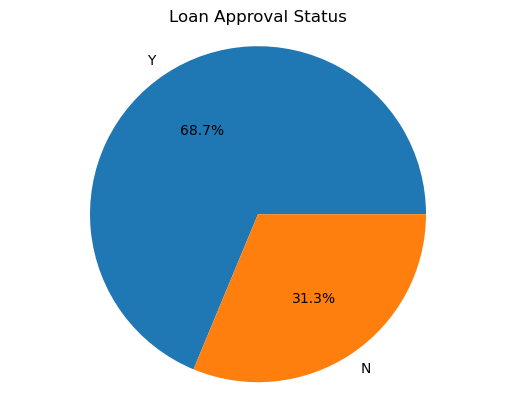

In [85]:
loan_status_counts = data['Loan_Status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%')
plt.title('Loan Approval Status')
plt.axis('equal')
plt.show()

<Axes: title={'center': 'COUNT PLOT FOR SELF EMPLOYED'}, ylabel='Self_Employed'>

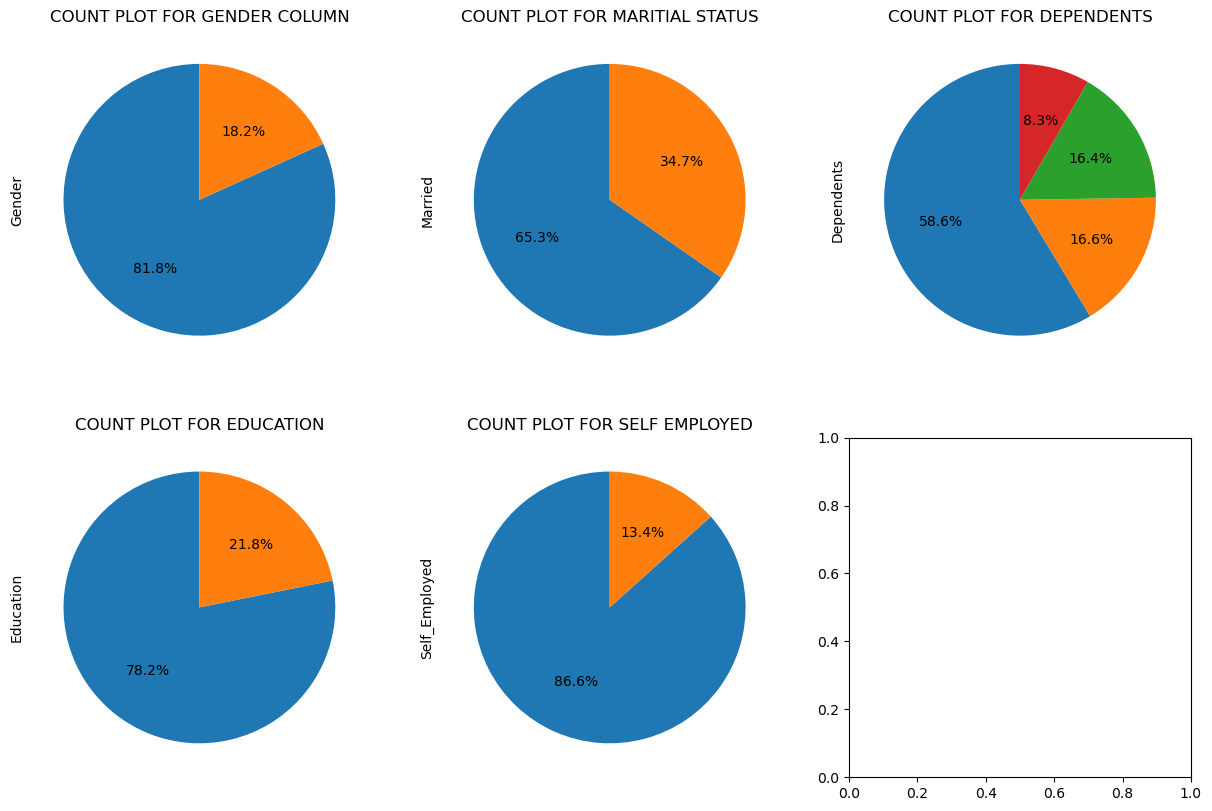

In [13]:
fig = plt.figure()

ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)

ax1.set_title('COUNT PLOT FOR GENDER COLUMN')
ax2.set_title('COUNT PLOT FOR MARITIAL STATUS')
ax3.set_title('COUNT PLOT FOR DEPENDENTS')
ax4.set_title('COUNT PLOT FOR EDUCATION')
ax5.set_title('COUNT PLOT FOR SELF EMPLOYED')

data['Gender'].astype(str).value_counts().plot(kind = 'pie', figsize = (15, 15), autopct = '%1.1f%%', startangle = 90, labels = None, ax =ax1)
data['Married'].astype(str).value_counts().plot(kind = 'pie', figsize = (15, 15), autopct = '%1.1f%%', startangle = 90, labels = None, ax =ax2)
data['Dependents'].astype(str).value_counts().plot(kind = 'pie', figsize = (15, 15), autopct = '%1.1f%%', startangle = 90, labels = None, ax =ax3)
data['Education'].astype(str).value_counts().plot(kind = 'pie', figsize = (15, 15), autopct = '%1.1f%%', startangle = 90, labels = None, ax =ax4)
data['Self_Employed'].astype(str).value_counts().plot(kind = 'pie', figsize = (15, 15), autopct = '%1.1f%%', startangle = 90, labels = None, ax =ax5)


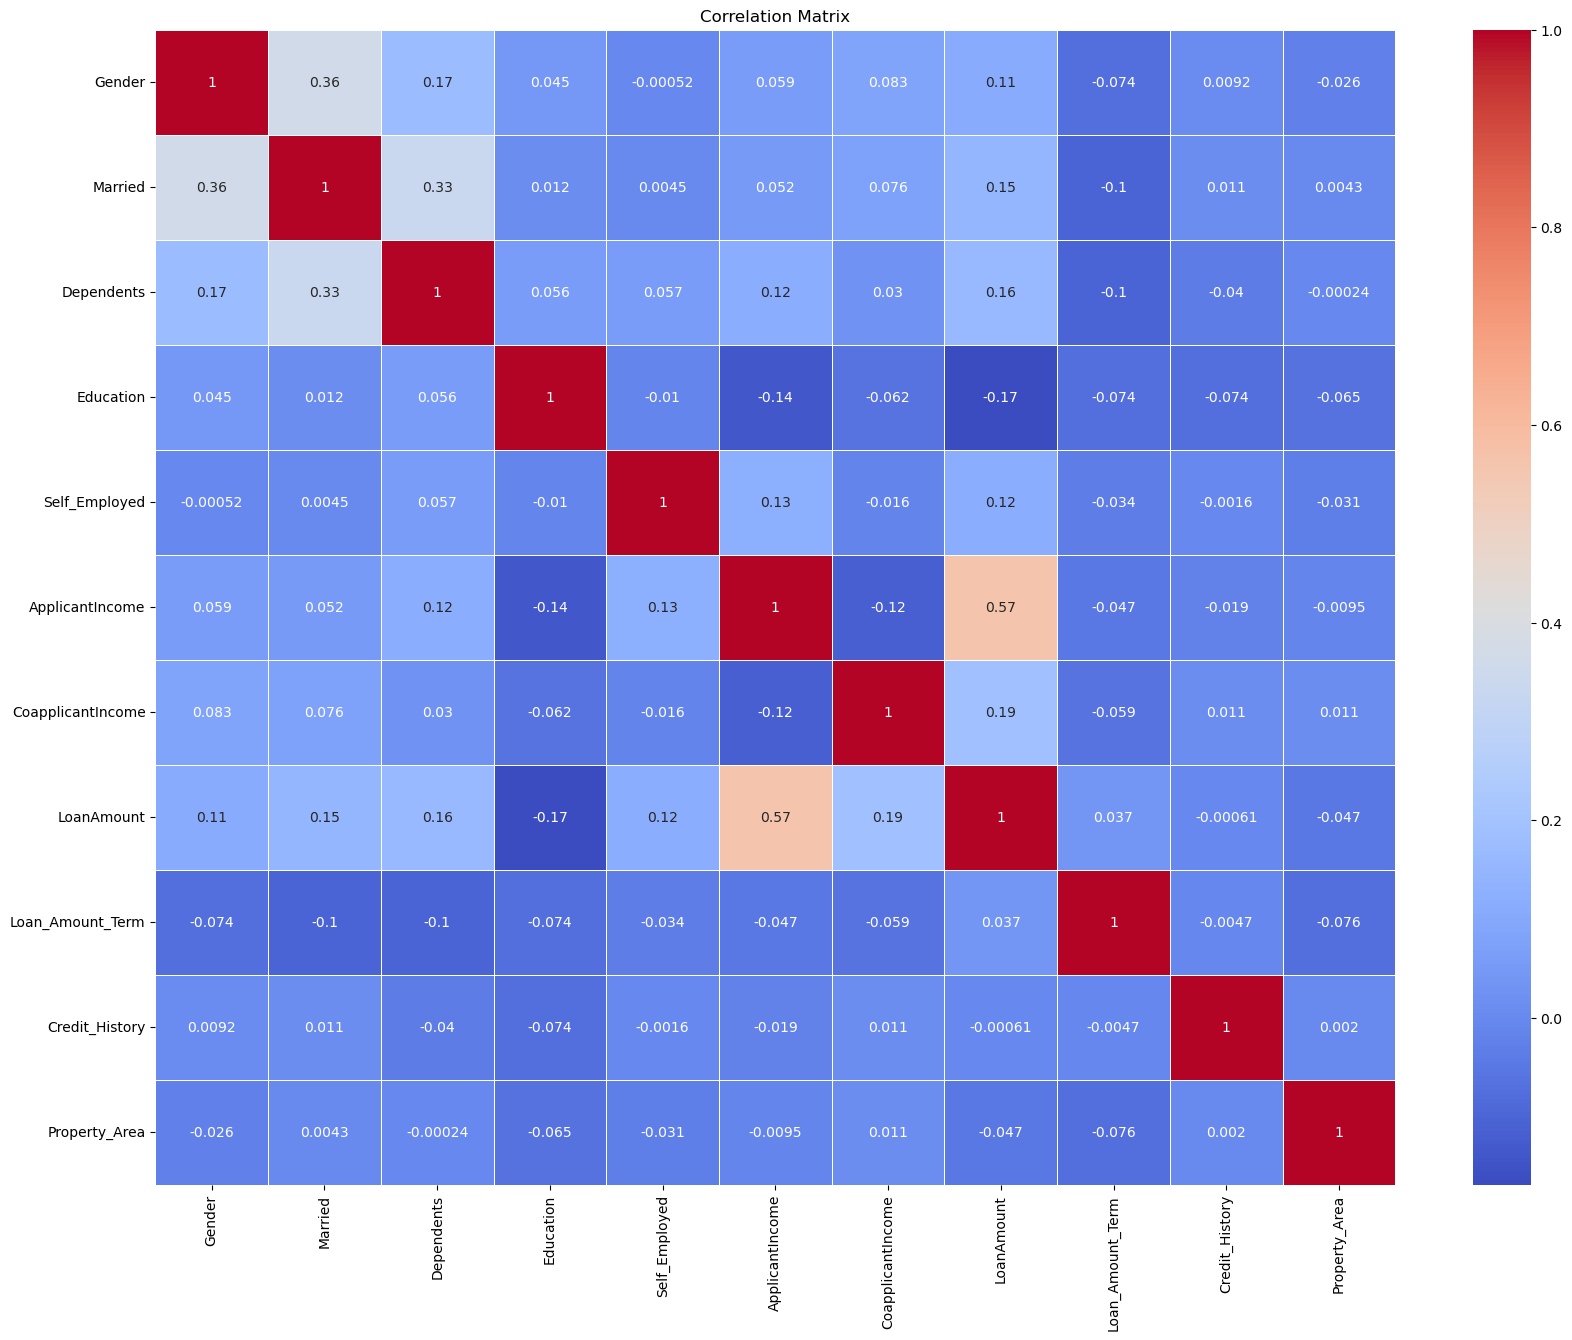

In [52]:
plt.figure(figsize = (20, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, linewidth = 0.5, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

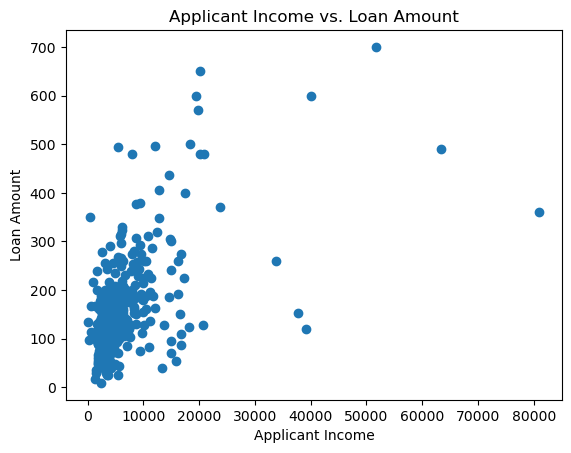

In [15]:
plt.scatter(data['ApplicantIncome'], data['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs. Loan Amount')
plt.show()

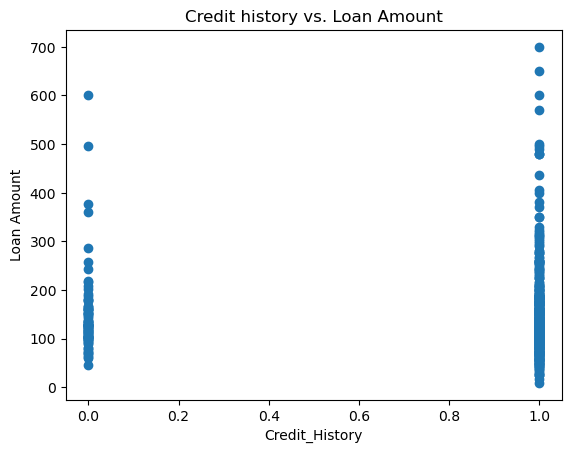

In [16]:
plt.scatter(data['Loan_Amount_Term'], data['LoanAmount'])
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Loan Amount')
plt.title('Loan_Amount_Term vs. Loan Amount')
plt.show()

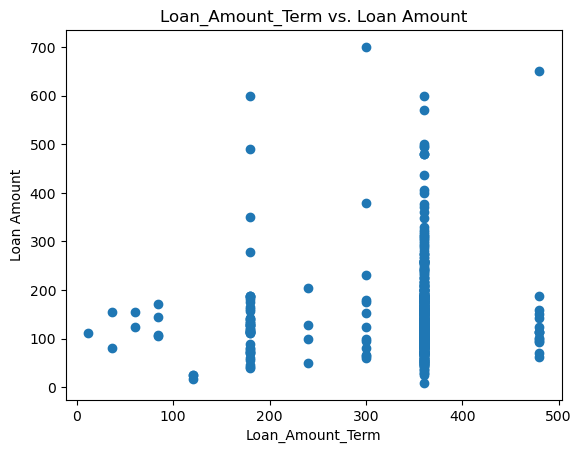

In [17]:
plt.scatter(data['Loan_Amount_Term'], data['LoanAmount'])
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Loan Amount')
plt.title('Loan_Amount_Term vs. Loan Amount')
plt.show()

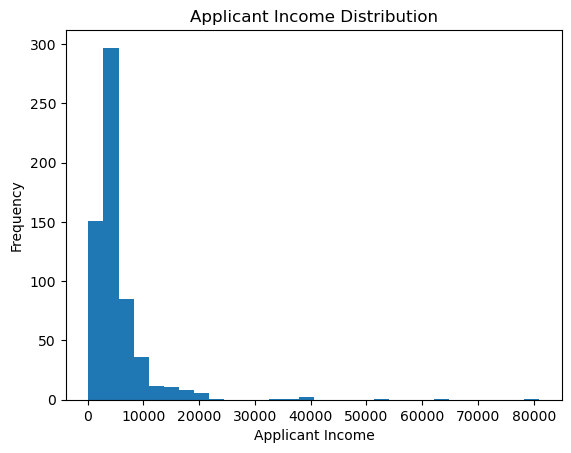

In [18]:
# Histogram - Applicant Income
plt.hist(data['ApplicantIncome'], bins=30)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

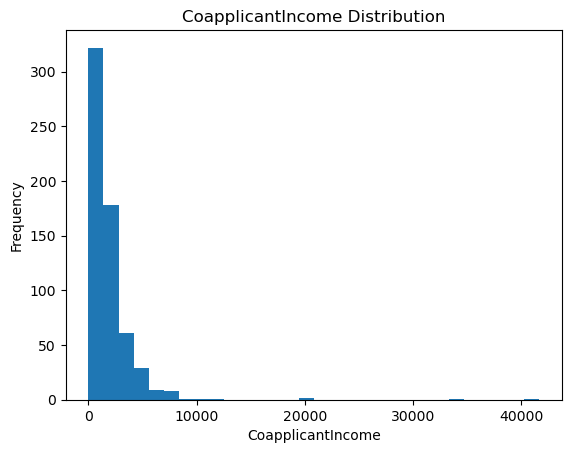

In [20]:
plt.hist(data['CoapplicantIncome'], bins=30)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.title('CoapplicantIncome Distribution')
plt.show()

In [19]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

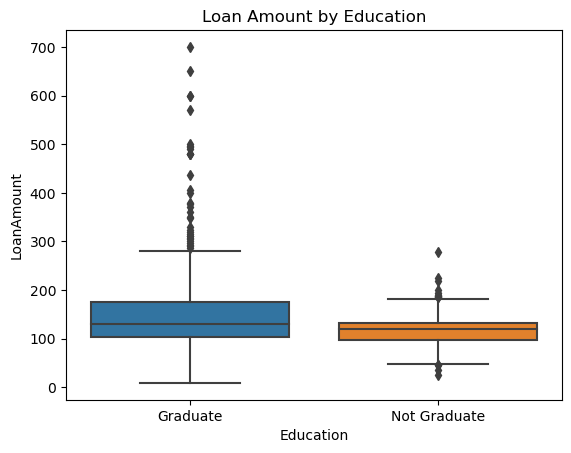

In [21]:
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Loan Amount by Education')
plt.show()

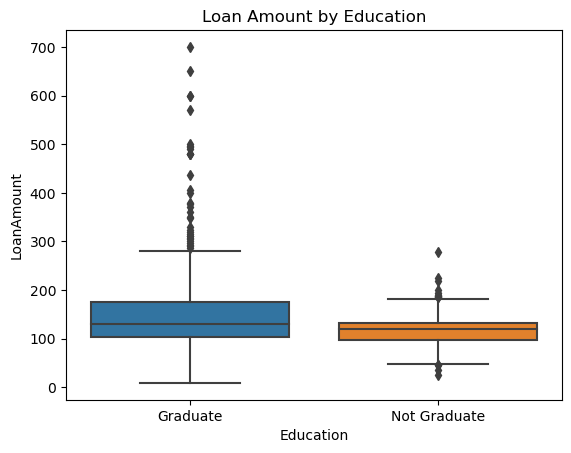

In [21]:
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Loan Amount by Education')
plt.show()

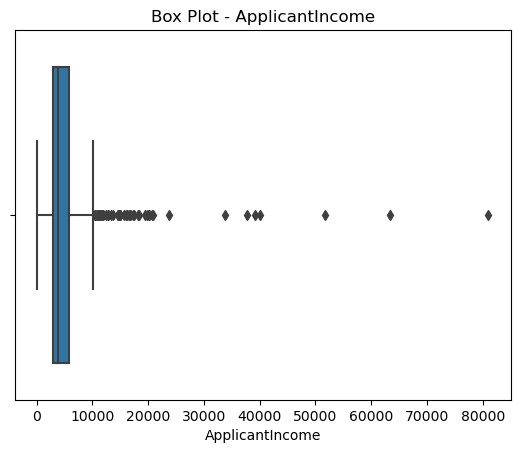

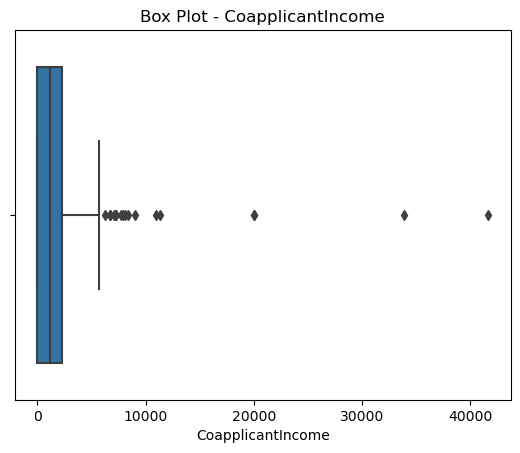

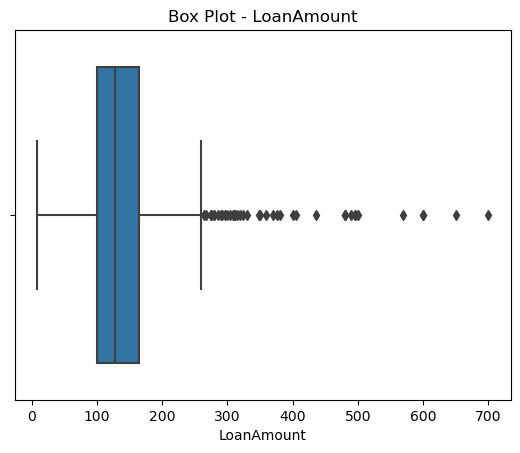

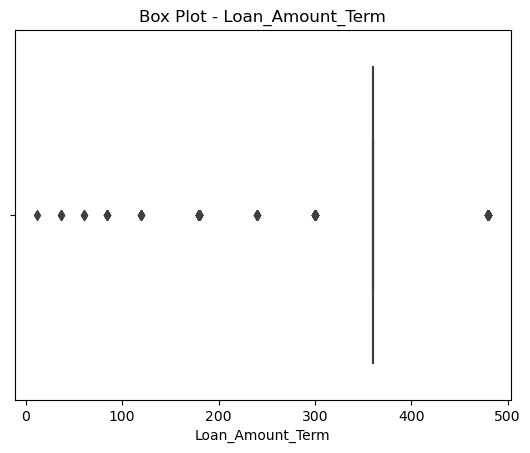

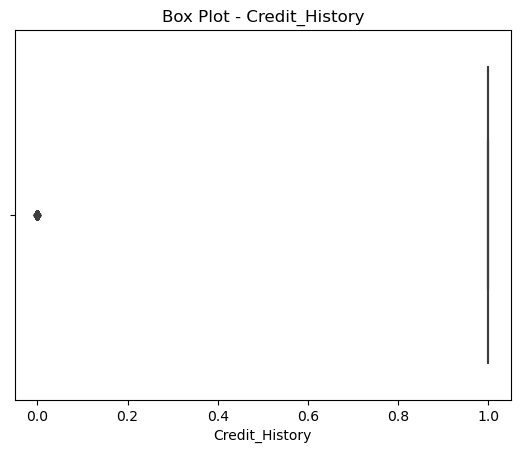

In [22]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for each numerical column
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot - {column}')
    plt.xlabel(column)
    plt.show()


In [99]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                     'Property_Area', 'Loan_Status']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column].astype(str))
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

In [103]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [105]:
X[cols] = sc.fit_transform(X[cols])

In [56]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.889500,0.273231,1.0,0
610,1,1,3,0,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,0
611,1,1,1,0,0,0.437174,-0.472404,1.276168,0.273231,1.0,2
612,1,1,2,0,0,0.357064,-0.554487,0.490816,0.273231,1.0,2


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

best_accuracy = 0
best_random_state = None

for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print(f"Best Random State: {best_random_state}")
print(f"Best Accuracy: {best_accuracy}")


Best Random State: 8
Best Accuracy: 0.8861788617886179


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Classification Report for {model_name}:\n{report}")
    
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-Validation Scores for {model_name}: {np.mean(cv_scores)}")
    
    print("-------------------------")


Training Logistic Regression...
Accuracy for Logistic Regression: 0.8861788617886179
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           N       1.00      0.58      0.73        33
           Y       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123

Cross-Validation Scores for Logistic Regression: 0.8061975209916034
-------------------------
Training Decision Tree...
Accuracy for Decision Tree: 0.7479674796747967
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           N       0.53      0.58      0.55        33
           Y       0.84      0.81      0.82        90

    accuracy                           0.75       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.76      0.75      0.75       123

Cross-

# TRAINING AND TESTING OUR MODEL

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2', '13', '14'],
    'C': [0.01, 0.1, 1, 10, 100]
}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8211382113821138
Classification Report:
               precision    recall  f1-score   support

           N       0.88      0.53      0.66        40
           Y       0.81      0.96      0.88        83

    accuracy                           0.82       123
   macro avg       0.84      0.74      0.77       123
weighted avg       0.83      0.82      0.81       123



In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=509)
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6747967479674797
Classification Report:
               precision    recall  f1-score   support

           N       0.50      0.03      0.05        40
           Y       0.68      0.99      0.80        83

    accuracy                           0.67       123
   macro avg       0.59      0.51      0.43       123
weighted avg       0.62      0.67      0.56       123



# HYPERTUNING THE MODEL

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8861788617886179


In [67]:
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=8)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", accuracy)


Accuracy on Testing Set: 0.8861788617886179


# ROC AUC CURVE

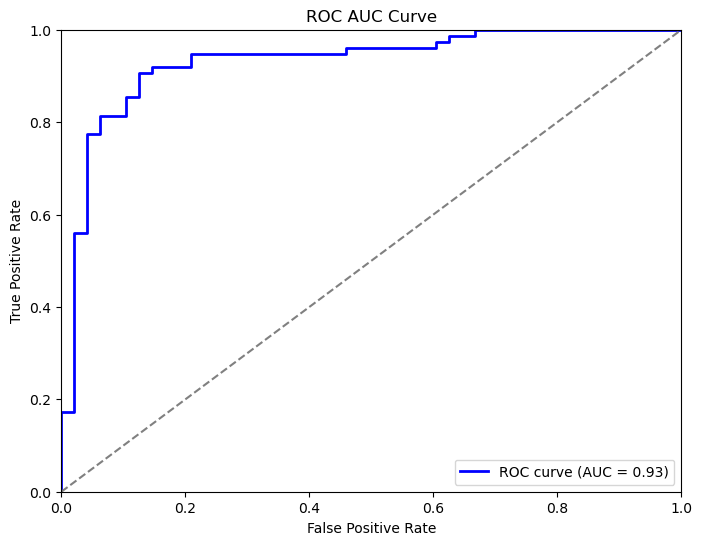

In [107]:

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()


# SAVE THE MODEL

In [ ]:

model_filename = 'random_forest_model.joblib'
joblib.dump(rf_classifier, model_filename)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", accuracy)


loaded_model = joblib.load(model_filename)


In [129]:
new_data = {
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Married': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Dependents': ['0', '1', '2', '0', '3+', '1', '0', '2', '3+', '1'],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
    'ApplicantIncome': [4000, 5000, 6000, 5500, 7000, 8000, 4500, 6000, 7500, 6500],
    'CoapplicantIncome': [2000, 1000, 3000, 2500, 1500, 2000, 500, 3000, 1000, 2500],
    'LoanAmount': [150, 100, 200, 180, 120, 250, 130, 180, 300, 220],
    'Loan_Amount_Term': [360, 240, 360, 360, 180, 360, 360, 240, 360, 360],
    'Credit_History': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'Property_Area': ['Urban', 'Rural', 'Semiurban', 'Urban', 'Rural', 'Semiurban', 'Urban', 'Rural', 'Semiurban', 'Urban']
}
sample_data_df = pd.DataFrame(sample_data)
sample_data_df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,4000,2000,150,360,1,Urban
1,Female,No,1,Not Graduate,No,5000,1000,100,240,0,Rural
2,Male,Yes,2,Graduate,Yes,6000,3000,200,360,1,Semiurban
3,Male,Yes,0,Graduate,No,5500,2500,180,360,1,Urban
4,Female,No,3+,Not Graduate,No,7000,1500,120,180,0,Rural


In [122]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                     'Property_Area']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    sample_data_df[column] = label_encoder.fit_transform(sample_data_df[column].astype(str))
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1


In [ ]:
import joblib

# Load the trained model from the saved file
model_filename = 'final_model.joblib'
loaded_model = joblib.load(model_filename)

# Make predictions on the sample data
predictions = loaded_model.predict(sample_data_df)

predictions
|